In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
data = pd.read_csv(url)

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Feature engineering: Extract hour, day, month, and week from 'date'
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.isocalendar().week

# Drop 'date' as it's now redundant
data = data.drop(columns=['date'])

# Display the first few rows
print(data.head())


   Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.000000  45.566667  ...    92.0   7.000000   63.000000        5.3   
1  19.000000  45.992500  ...    92.0   6.666667   59.166667        5.2   
2  18.926667  45.890000  ...    92.0   6.333333   55.333333        5.1   
3  18.890000  45.723333  ...    92.0   6.000000   51.500000        5.0   
4  18.890000  45.530000  ...    92.0   5.666667   47.666667        4.9   

         rv1        rv2  hour  day  month  week  
0  13.275433  13.275433    17   11  

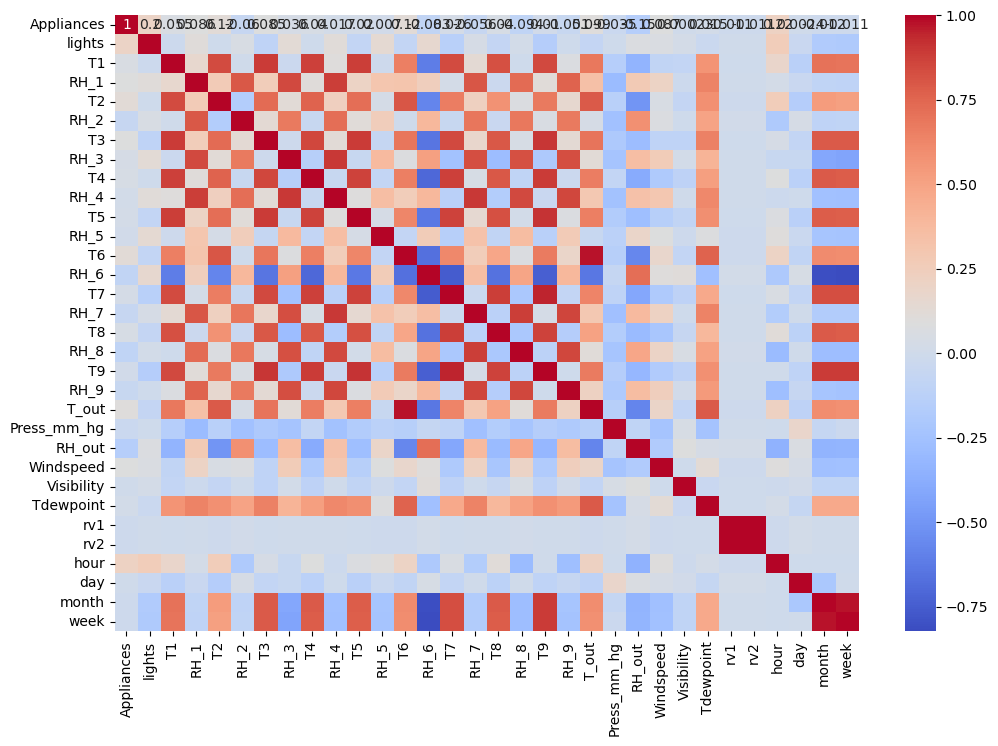

c:\Users\mrindfleisch\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


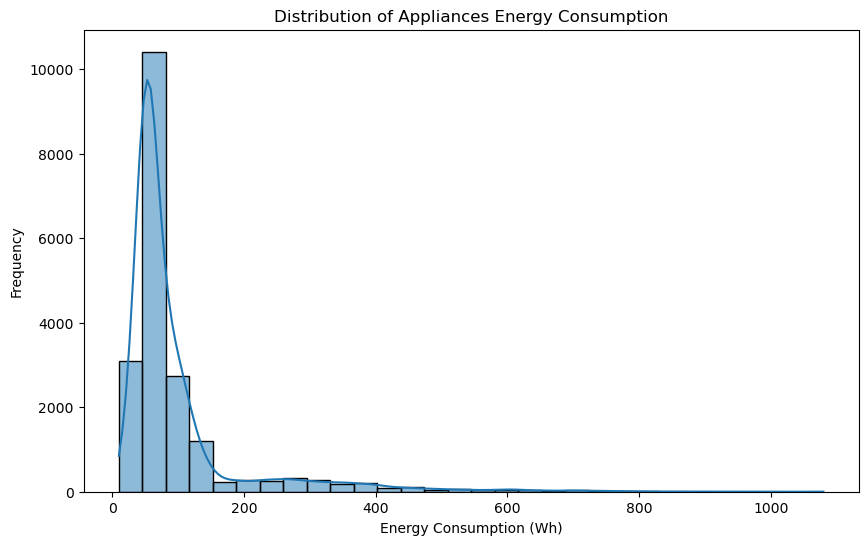

In [3]:
# Correlation matrix to see how features relate to the target variable 'Appliances'
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Distribution of the target variable 'Appliances'
plt.figure(figsize=(10, 6))
sns.histplot(data['Appliances'], kde=True, bins=30)
plt.title('Distribution of Appliances Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()


In [4]:
data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'hour', 'day', 'month', 'week'],
      dtype='object')

In [21]:
to_drop = ['Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'Appliances', 'lights', 'T6', 'RH_6']

In [22]:
# Selecting features and target variable
X = data.drop(columns=to_drop)  # Dropping 'lights' as it may not be necessary
y = data['Appliances']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'hour', 'day',
       'month', 'week'],
      dtype='object')

In [23]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}, R^2: {r2_lr}")


Linear Regression - MAE: 53.54331342061984, RMSE: 92.76775397313078, R^2: 0.14002419920755316


In [24]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")


Random Forest - MAE: 29.053590068406383, RMSE: 63.302779940645834, R^2: 0.5995597611186465


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [25]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16097984565816936, 'hour'),
 (0.06532742580855916, 'T3'),
 (0.06447504707872388, 'T_out'),
 (0.0603945061896646, 'RH_3'),
 (0.05266529785769768, 'RH_2'),
 (0.05124294725755978, 'RH_5'),
 (0.04975846142575838, 'RH_9'),
 (0.04787741350109524, 'RH_1'),
 (0.04785609551567166, 'RH_8'),
 (0.047551754675459745, 'T8'),
 (0.04494291111049252, 'RH_7'),
 (0.04434035406907092, 'RH_4'),
 (0.03909110564297804, 'T2'),
 (0.038809020746843934, 'T4'),
 (0.037900160589419606, 'T7'),
 (0.03666866093788886, 'T5'),
 (0.034466623214087666, 'T1'),
 (0.026967823769286185, 'T9'),
 (0.022596328410332652, 'day'),
 (0.02252887634528436, 'week'),
 (0.003559340195955734, 'month')]

C:\Users\mrindfleisch\AppData\Local\Temp\ipykernel_32792\839578106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_importances.drop(columns=1, inplace=True)
C:\Users\mrindfleisch\AppData\Local\Temp\ipykernel_32792\839578106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_importances.rename(columns={0: 'Feature Importances'}, inplace=True)


<Axes: title={'center': 'Features Importances'}, ylabel='1'>

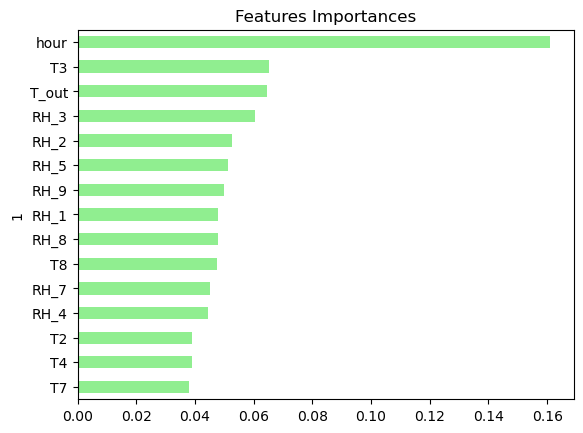

In [26]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
top_importances = importances_df[:15]
top_importances.set_index(top_importances[1], inplace=True)
top_importances.drop(columns=1, inplace=True)
top_importances.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = top_importances.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [27]:
# Comparing Linear Regression and Random Forest

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R^2': [r2_lr, r2_rf]
})

print(models)




               Model        MAE       RMSE       R^2
0  Linear Regression  53.543313  92.767754  0.140024
1      Random Forest  29.053590  63.302780  0.599560


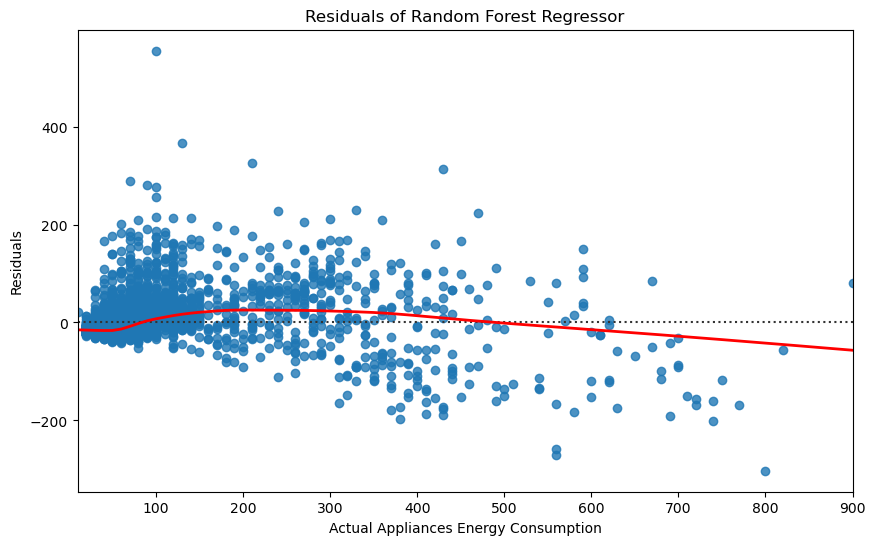

In [28]:
# Residual Plot for Random Forest
plt.figure(figsize=(10, 6))
# Use 'x' and 'y' as named arguments for clarity and compatibility
sns.residplot(x=y_test, y=y_pred_rf, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals of Random Forest Regressor')
plt.xlabel('Actual Appliances Energy Consumption')
plt.ylabel('Residuals')
plt.show()

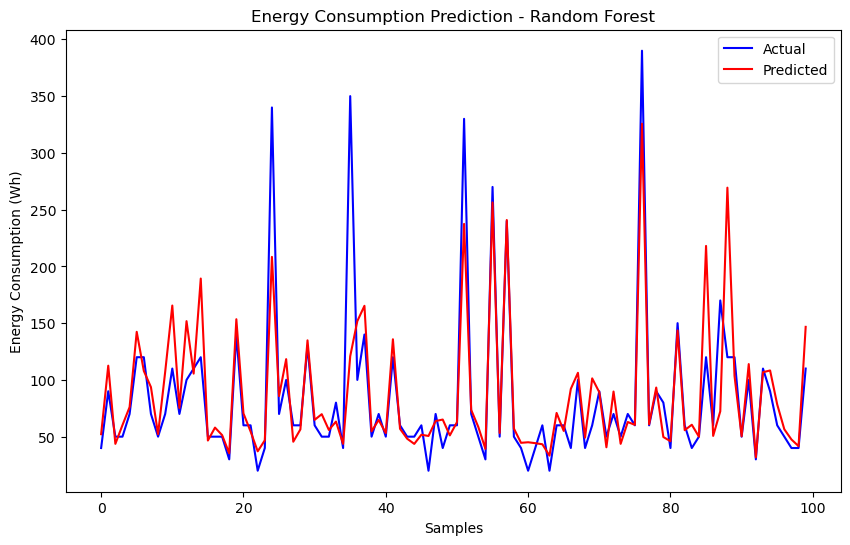

In [29]:
# Visualizing the prediction vs actual for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(y_pred_rf[:100], label='Predicted', color='red')
plt.title('Energy Consumption Prediction - Random Forest')
plt.xlabel('Samples')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.show()


- Model lights as the target instead of appliances

In [16]:
to_drop

['Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'Appliances',
 'lights',
 'T6',
 'RH_6']

In [30]:
# Selecting features and target variable
X = data.drop(columns=to_drop)  # Dropping 'lights' as it may not be necessary
y = data['lights']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Linear Regression
lr_model2 = LinearRegression()
lr_model2.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_lr = lr_model2.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}, R^2: {r2_lr}")


Linear Regression - MAE: 4.913036228939055, RMSE: 6.934366223113303, R^2: 0.21492669614810544


In [36]:
# Random Forest Regressor
rf_model2 = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model2.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model2.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")


Random Forest - MAE: 2.307398023815556, RMSE: 4.279472120673174, R^2: 0.7009959547225098


In [20]:
# Comparing Linear Regression and Random Forest

models2 = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R^2': [r2_lr, r2_rf]
})

print(models2)


               Model       MAE      RMSE       R^2
0  Linear Regression  4.913036  6.934366  0.214927
1      Random Forest  2.298860  4.278542  0.701126


c:\Users\mrindfleisch\AppData\Local\anaconda3\envs\dev\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


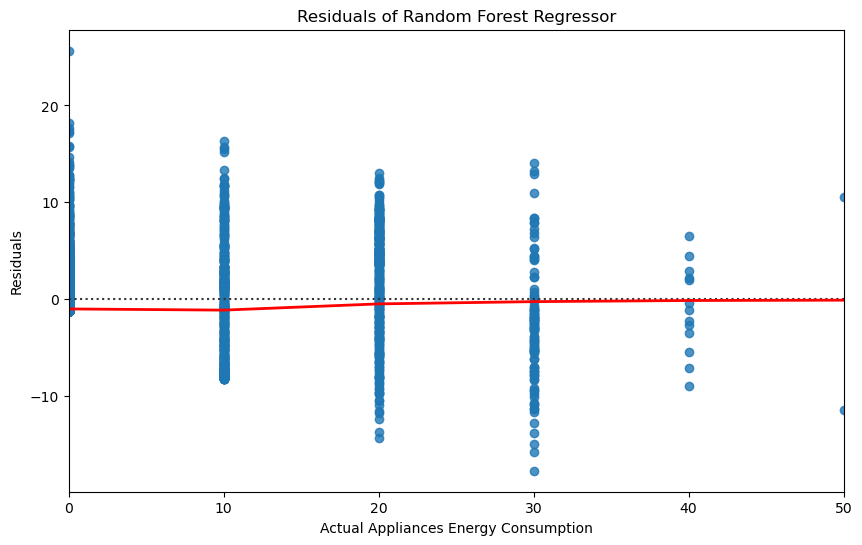

In [37]:
# Residual Plot for Random Forest
plt.figure(figsize=(10, 6))
# Use 'x' and 'y' as named arguments for clarity and compatibility
sns.residplot(x=y_test, y=y_pred_rf, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals of Random Forest Regressor')
plt.xlabel('Actual Appliances Energy Consumption')
plt.ylabel('Residuals')
plt.show()

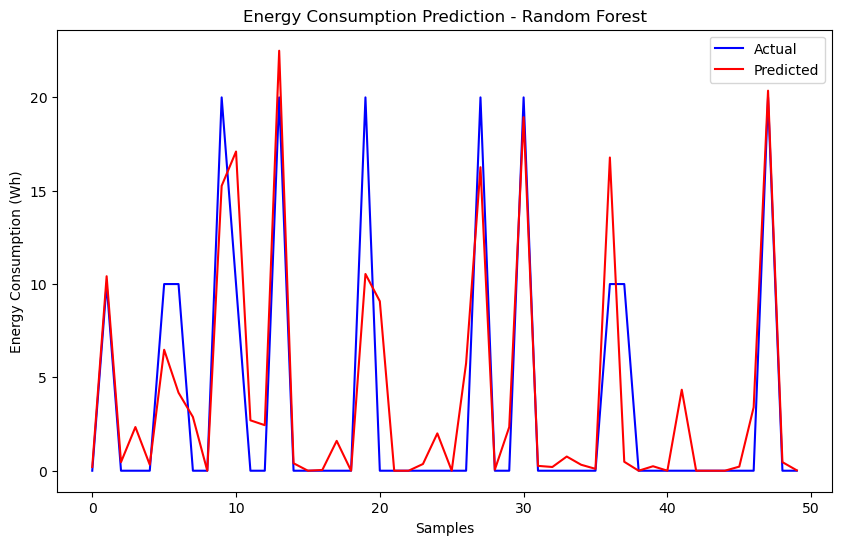

In [40]:
# Visualizing the prediction vs actual for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual', color='blue')
plt.plot(y_pred_rf[:50], label='Predicted', color='red')
plt.title('Energy Consumption Prediction - Random Forest')
plt.xlabel('Sample Number')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.show()


In [ ]:
importances = rf_model2.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model2.feature_importances_, X.columns), reverse=True)

In [ ]:
importances_df = pd.DataFrame(sorted(zip(rf_model2.feature_importances_, X.columns), reverse=True))
top_importances = importances_df[:15]
top_importances.set_index(top_importances[1], inplace=True)
top_importances.drop(columns=1, inplace=True)
top_importances.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = top_importances.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [10]:
# Selecting features and target variable
X = data.drop(columns=['Appliances', 'lights'])  # Dropping 'lights' as it may not be necessary
y = data['Appliances']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'X' and 'y' with your features and target variable)
# X, y = load_data()

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7086.36467892386


In [14]:
# Predictions and Evaluation
y_pred_rf = gbm.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")

Random Forest - MAE: 755.3032652719712, RMSE: 762.8553489235806, R^2: -57.15359107969023


c:\Users\mrindfleisch\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
